# Importing Modules and loading data

In [9]:
import sys
import os
sys.path.append('./Scripts')
sys.path.append('./Files')
sys.path.append('./Datasets')

In [10]:
os.system('pip install nltk')
os.system('pip install openpyxl')
os.system('pip install emot')

0

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
import openpyxl
import emot
import pickle

# from google.colab import files
from nltk.corpus import stopwords
import nltk
import seaborn as sns
nltk.download('punkt')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

from dataCleaner import preProcess
import ArStemmerLib as lib
import lexicon
from lexicon import calc_lexicon

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\youss\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
df2 = pd.read_csv('Datasets/tweets_train.csv')
df1 = pd.read_csv('Datasets/NU_EG_Twitter_corpus_train.csv')

In [13]:
df1.head()

,id,sentiment,tweet
0,271,negative,فينو الاهبل ابن الاهبل
1,131,positive,على المصرييييين وجمالهم ربنا يحميهم #MinaAtta ...
2,118,positive,@Kholoudkewan دول كتير اوى ودمهم خفيف العمارة...
3,6,negative,انا بعد كده خلى اللى يوعنى بحاجه همضى على و...
4,3430,negative,انا هنتحر


In [14]:
df2.rename(columns={"text":"tweet"},inplace=True)

In [15]:
#Appending the data of the two datasets into one data frame
df = df2.append(df1,ignore_index = True)

C:\Users\youss\AppData\Local\Temp\ipykernel_29400\2019465929.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df2.append(df1,ignore_index = True)


In [16]:
df.drop(df[df['sentiment']=='OBJ'].index, inplace = True)
df.drop(df[df['sentiment']=='OBJ"'].index, inplace = True)

df['sentiment'] = df['sentiment'].replace(['NEG"'],'negative')
df['sentiment'] = df['sentiment'].replace(['POS"'],'positive')
df['sentiment'] = df['sentiment'].replace(['NEG'],'negative')
df['sentiment'] = df['sentiment'].replace(['POS'],'positive')
df['sentiment'] = df['sentiment'].replace(['NEUTRAL'],'neutral')

df.drop("id", axis=1, inplace=True)

In [17]:
df.to_csv("Datasets/merged_train_datasets.csv")

In [8]:
tweets_df = pd.read_csv('Datasets/tweets_sns2.csv')
keep_regex = "[Vv]odafone|VODAFONE|فودافون|[Ee]tisalat|ETISALAT|اتصالات|[Oo]range|ORANGE|اورانج|موبينيل|إتصالات|أورانج"
remove_regex = "لون"
drop_indeces = tweets_df[(tweets_df['text'].str.contains(keep_regex)==False) | (tweets_df['text'].str.contains(remove_regex)==True)].index
tweets_df.drop(drop_indeces, inplace=True)
tweets= tweets_df['text'].copy()
tweets2 = df['tweet'].copy()
tokens1 = set(nltk.word_tokenize(' '.join(tweets.to_numpy().flatten())))
tokens2 = set(nltk.word_tokenize(' '.join(tweets2.to_numpy().flatten())))
def tweet_filter(tweet: str, bucket: set[str]) -> bool:
    tokens = set(nltk.word_tokenize(tweet))
    inclusion_ratio =  len(tokens.intersection(bucket)) / len(tokens)
    return inclusion_ratio >= 0.5

filtered_tweets = tweets.to_numpy()[[tweet_filter(x, tokens2) for x in tweets.to_numpy()]]

In [9]:
len(filtered_tweets)

1683

In [10]:
df4 = pd.DataFrame()
df4['id'] = np.zeros(len(filtered_tweets))
df4['sentiment'] = "positive"
df4['tweet']=filtered_tweets

In [11]:
df4.tail()

,id,sentiment,tweet
1678,0.0,positive,لا ولاقى واحد بيقول قطر بتمول الوايت نايتس !!!...
1679,0.0,positive,اقسم بالله شركه اورانج دى عليها كرم وذوق عدى ا...
1680,0.0,positive,اعلان فودافون عمرو دياب واعلان اورانج واعلان ...
1681,0.0,positive,اعلان فودافون يستاهل يطلع تريند ♥️
1682,0.0,positive,منزلة ستوري واتساب ع حوار إنك تفتح نت من فوداف...


In [12]:
df = df.append(df4, ignore_index=True)

C:\Users\youss\AppData\Local\Temp\ipykernel_11048\1590877209.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df4, ignore_index=True)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14288 entries, 0 to 14287
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet      14288 non-null  object 
 1   sentiment  13470 non-null  object 
 2   id         4429 non-null   float64
dtypes: float64(1), object(2)
memory usage: 335.0+ KB


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8320 entries, 1 to 14287
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      8320 non-null   object
 1   sentiment  7502 non-null   object
dtypes: object(2)
memory usage: 195.0+ KB


In [17]:
df = df.dropna()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7502 entries, 1 to 14287
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet      7502 non-null   object
 1   sentiment  7502 non-null   object
dtypes: object(2)
memory usage: 175.8+ KB


In [20]:
df.head()

,tweet,sentiment
1,أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...,positive
2,البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...,negative
4,الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...,neutral
5,#انتخبوا_العرص #انتخبوا_البرص #مرسى_رئيسى #اين...,neutral
6,امير عيد هو اللي فعلا يتقال عليه ستريكر صريح #...,positive


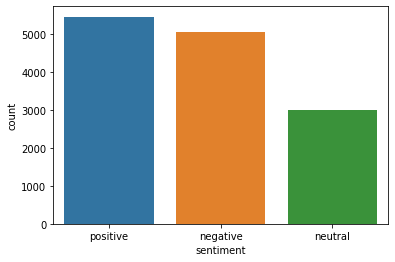

In [52]:
_ = sns.countplot(x='sentiment', data=df)

# Calling methods for preprocessing

In [21]:
df['tweet']

1        أهنئ الدكتور أحمد جمال الدين، القيادي بحزب مصر...
2        البرادعي يستقوى بامريكا مرةاخرى و يرسل عصام ال...
4        الوالدة لو اقولها بخاطري حشيشة تضحك بس من اقول...
5        #انتخبوا_العرص #انتخبوا_البرص #مرسى_رئيسى #اين...
6        امير عيد هو اللي فعلا يتقال عليه ستريكر صريح #...
                               ...                        
14283    لا ولاقى واحد بيقول قطر بتمول الوايت نايتس !!!...
14284    اقسم بالله شركه اورانج دى عليها كرم وذوق عدى ا...
14285    اعلان فودافون عمرو دياب واعلان اورانج  واعلان ...
14286                   اعلان فودافون يستاهل يطلع تريند ♥️
14287    منزلة ستوري واتساب ع حوار إنك تفتح نت من فوداف...
Name: tweet, Length: 7502, dtype: object

In [22]:
preProcess(df=df)

# Vectorizers

In [23]:
count_vec = CountVectorizer(ngram_range=(1,1))

In [24]:
tfidf_vec = TfidfVectorizer()

# Splitting data

In [25]:
X_train_tfidf,X_test_tfidf,Y_train_tfidf,Y_test_tfidf = train_test_split(tfidf_vec.fit_transform(df['tweet']), df['sentiment'], test_size=0.25, random_state=1)

In [26]:
X_train_count,X_test_count,Y_train_count,Y_test_count = train_test_split(count_vec.fit_transform(df['tweet']), df['sentiment'], test_size=0.25, random_state=1)

In [27]:
X_train ,X_test ,Y_train ,Y_test  = train_test_split(df['tweet'], df['sentiment'], test_size=0.25, random_state=1)

In [28]:
Y_test_tfidf.head()

10140    positive
10364    negative
2016     negative
623      negative
9780     positive
Name: sentiment, dtype: object

In [29]:
le = LabelEncoder()
Y_test_tfidf = le.fit_transform(Y_test_tfidf)
Y_test_count = le.fit_transform(Y_test_count)
Y_test = le.fit_transform(Y_test)
Y_train_tfidf = le.fit_transform(Y_train_tfidf)
Y_train_count = le.fit_transform(Y_train_count)
Y_train = le.fit_transform(Y_train)

# Naive Bayes

In [30]:
cl = MultinomialNB()

## Using Lexicon and Count Vectorization

In [31]:
#calculate the lexicon
tweet_train_lex = []
for tweet in X_train:
    tweet_train_lex.append(calc_lexicon(u"%s" %tweet))

tweet_test_lex = []
for tweet in X_test:
    tweet_test_lex.append(calc_lexicon(u"%s" %tweet))

In [32]:
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse import hstack
tweet_lex_train_sparse = csr_matrix(tweet_train_lex)
tweet_lex_test_sparse = csr_matrix(tweet_test_lex)
tweet_lex_test_sparse

<1876x2 sparse matrix of type '<class 'numpy.float64'>'
	with 1378 stored elements in Compressed Sparse Row format>

In [33]:
train_feature_matrix = hstack((X_train_count, tweet_lex_train_sparse))
test_feature_matrix = hstack((X_test_count, tweet_lex_test_sparse))
test_feature_matrix

<1876x21018 sparse matrix of type '<class 'numpy.float64'>'
	with 18633 stored elements in Compressed Sparse Row format>

In [34]:
nb_lexicon = cl.fit(train_feature_matrix,Y_train)
predicted = cl.predict(test_feature_matrix)
acc = accuracy_score(Y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test,predicted))

accuracy = 64.87206823027718%
              precision    recall  f1-score   support

           0       0.63      0.65      0.64       620
           1       0.37      0.22      0.27       377
           2       0.72      0.83      0.77       879

    accuracy                           0.65      1876
   macro avg       0.57      0.57      0.56      1876
weighted avg       0.62      0.65      0.63      1876



In [35]:
nb_lex_model_path = 'Models/nb_lexicon_model.sav'
pickle.dump(nb_lexicon, open(nb_lex_model_path,'wb'))

## Using TF-IDF

In [36]:
nb_tfidf = cl.fit(X_train_tfidf, Y_train_tfidf)
p = cl.predict(X_test_tfidf)
acc = accuracy_score(Y_test_tfidf,p)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test,p))

accuracy = 62.20682302771855%
              precision    recall  f1-score   support

           0       0.65      0.53      0.59       620
           1       0.33      0.01      0.02       377
           2       0.61      0.95      0.74       879

    accuracy                           0.62      1876
   macro avg       0.53      0.50      0.45      1876
weighted avg       0.57      0.62      0.55      1876



In [37]:
nb_tfidf_model_path = 'Models/nb_tfidf_model.sav'
pickle.dump(nb_tfidf, open(nb_tfidf_model_path,'wb'))

# Lexicon + TF-IDF

In [38]:
train_feature_matrix_tf = hstack((X_train_tfidf, tweet_lex_train_sparse))
test_feature_matrix_tf = hstack((X_test_tfidf, tweet_lex_test_sparse))
test_feature_matrix_tf

<1876x21018 sparse matrix of type '<class 'numpy.float64'>'
	with 18633 stored elements in Compressed Sparse Row format>

In [39]:
nb_lex_tfidf = cl.fit(train_feature_matrix_tf,Y_train)
predicted = cl.predict(test_feature_matrix_tf)
acc = accuracy_score(Y_test,predicted)
print ('accuracy = '+str(acc*100)+'%')
print (classification_report(Y_test,predicted))

accuracy = 62.79317697228145%
              precision    recall  f1-score   support

           0       0.63      0.60      0.61       620
           1       0.20      0.01      0.01       377
           2       0.63      0.91      0.75       879

    accuracy                           0.63      1876
   macro avg       0.49      0.51      0.46      1876
weighted avg       0.54      0.63      0.55      1876



In [40]:
nb_lex_tfidf_model_path = 'Models/nb_lex_tfidf_model.sav'
pickle.dump(nb_lex_tfidf, open(nb_lex_tfidf_model_path,'wb'))

# Logistic Regression TF-IDF

In [41]:
lg =  LogisticRegression(max_iter=1000)

In [42]:
# make param grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# create and fit the model
model = GridSearchCV(lg, param_grid, cv=10)

In [43]:
lg_model_path = 'Models/lg_tfidf_model.sav'

In [44]:
model.fit(X_train_tfidf,Y_train_tfidf)
pickle.dump(model, open(lg_model_path,'wb'))

In [45]:
# make prediction and print accuracy
prediction = model.predict(X_test_tfidf)
print(f"Accuracy score is {accuracy_score(Y_test_tfidf, prediction):.2f}")

Accuracy score is 0.67


In [46]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.58      0.77      0.66       620
           1       0.55      0.11      0.19       377
           2       0.76      0.84      0.80       879

    accuracy                           0.67      1876
   macro avg       0.63      0.57      0.55      1876
weighted avg       0.66      0.67      0.63      1876



# Logistic Reg using Lexicon + Count Vectorizer

In [47]:
lg_lexicon = model.fit(train_feature_matrix,Y_train)
pickle.dump(model, open(lg_model_path,'wb'))
prediction = model.predict(test_feature_matrix)
print(f"Accuracy score is {accuracy_score(Y_test, prediction):.2f}")
print(classification_report(Y_test, prediction))

Accuracy score is 0.68
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       620
           1       0.51      0.14      0.22       377
           2       0.74      0.86      0.79       879

    accuracy                           0.68      1876
   macro avg       0.62      0.58      0.56      1876
weighted avg       0.65      0.68      0.64      1876



In [48]:
lg_lexicon_model_path = 'Models/lg_lexicon_model.sav'
pickle.dump(lg_lexicon, open(lg_lexicon_model_path,'wb'))